<a href="https://colab.research.google.com/github/huskeypm/cellmigration/blob/main/expt_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exptl analysis
Last ran on colab, 240311

This notebook
* loads tif files from a migration experiment,
* uses trackpy to find moving cells, and
* fits a linear equation to their mean square displacements to obtain a diffusion coefficient.

Data
* My input data is currently located at
/content/drive/MyDrive/public/
which is mounted to google drive.
* This path will need to be adjusted if data are stored elsewhere

Usage:
* Copy files of interest to an appropriate google drive directory
(current set is from )
- run the first part of the code to completion, modifying the default parameters to work with your data
- once the right parameters are determined, process your remaining files; a csv file should result for each input file

To analyze
- Use second part of notebook to load in csv files and plot

Install needed packages



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip3 install pims trackpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pims: filename=PIMS-0.6.1-py3-none-any.whl size=82615 sha256=0c9475a6766294ad9b9493ac18acf7c2e8318d994f2fc479250b72afe098f029
  Stored in directory: /root/.cache/pip/wheels/cc/bf/3e/bfa77232d942f8244145f9c713b6b38f6ef04b6fb5c021c114
  Created wheel for trackpy: filename=trackpy-0.6.2-py3-none-any.whl size=130035 sha256=2f12926256f5c5c4f9d65a4cc4b35fd0010ad3d082450b4a6328ebb097e9ac3c
  Stored in directory: /root/.cache/pip/wheels/5f/9a/2f/ad3db472b01ad7848e38e89b0b2fabd4e8fc14d8a499d10e06
Successfully built pims trackpy


Check out cellmigration github repo

In [3]:
!git clone https://github.com/huskeypm/cellmigration.git
#!cd cellmigration; git pull

Cloning into 'cellmigration'...
remote: Enumerating objects: 875, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 875 (delta 143), reused 126 (delta 110), pack-reused 684
Receiving objects: 100% (875/875), 14.66 MiB | 14.58 MiB/s, done.
Resolving deltas: 100% (550/550), done.


In [ ]:
import sys
sys.path.append("cellmigration")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import tifffile

import expt_analysis.trackcells as tc

Mount google drive.
I added a shortcut to a shared tif file in my 'public' directory

 /content/drive/MyDrive/public/

# Process raw images
## Image processing

Define inputs (pretty much the only places needed for making changes)

In [ ]:
# read in image and show first frame
user = "Emily"
user = "PKH"
useGdrive = False
if user == "Emily":
  name='Position4'
  fileName=r"C:\Users\ekrue\Downloads\12_13_23_{}.tif".format(name)
elif user == "PKH":
  #name = "Position_1" #
  name = "Position_2"
  gpath=('/content/drive')
  path=gpath+"/MyDrive/public/"
  fileName = path+"/%s_movie.tif"%name
  useGdrive=True
# time/frame conversion
fr = 180 # s/fr # experiment

# image processing parameters
downsampleRate = 4
crop=True
thresh=True


# determine parameters to track particles
# paramters: diameter, minmass
#- positiion 1
diameter=101  # adjust me first
minmass = 1000
#- positiion 2
diameter=91  # adjust me first
minmass = 100

# for fitting MSDs
fittingRange=[0,100]



Read images

In [ ]:
if useGdrive:
  from google.colab import drive
  drive.mount(gpath)

(480, 1200, 1200)


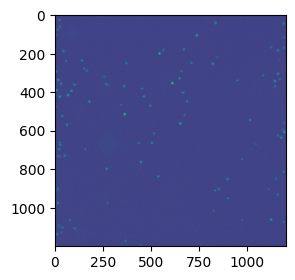

In [ ]:
# read image
raw_data = tifffile.imread(fileName)
print(raw_data.shape)

multiChannel = False
if multiChannel:
  channel=0
  frames=raw_data[:,channel,:,:]
else:
  frames=raw_data[:,:,:]

plt.imshow(frames[0,:,:])


(120, 300, 300)


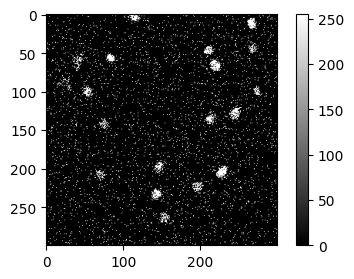

In [ ]:
threshed = tc.ProcessFrames(frames,downsampleRate=downsampleRate,crop=crop,thresh=thresh)

### Tracking

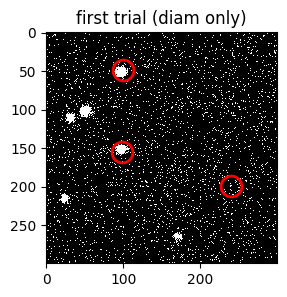

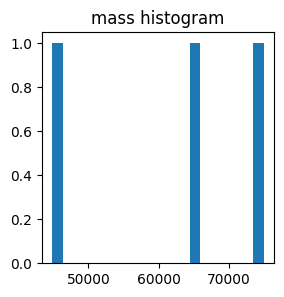

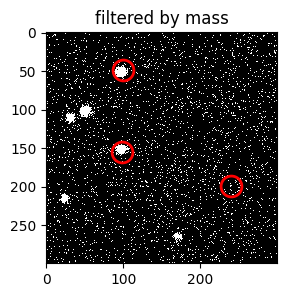

In [ ]:
dummy = tc.TrialParams(threshed,refFrame=0,diameter=diameter,minmass=minmass)
if dummy.shape[0] <1:
  print("Error finding cells; try different parameters")
else:
  finalStack = threshed


In [ ]:
# run batch/tracking
fb=tc.DoTracking(finalStack,diameter=diameter,minmass=minmass)

try:
  print("shape final %d"%fb.shape[0])
except:
  print("Unsuccessful tracking")

fb

Frame 119: 2 features
shape final 255


,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,48.648850,99.296046,74964.740541,21.691755,0.062414,235.998296,138210.0,NaN,0
1,154.477469,98.659296,65111.719579,21.596027,0.048722,236.899067,130560.0,NaN,0
2,199.468924,239.763681,44855.806330,30.160968,0.102194,116.611524,95625.0,NaN,0
3,48.684835,115.751334,73179.161291,20.284818,0.037504,236.998121,131325.0,NaN,1
4,141.320146,95.140684,66812.782092,21.851700,0.110261,233.962641,134385.0,NaN,1
...,...,...,...,...,...,...,...,...,...
250,71.890202,192.796071,50409.783746,23.914314,0.094102,242.150937,86445.0,NaN,118
251,179.131039,234.179286,70840.509260,28.526975,0.551614,240.857692,110925.0,NaN,118
252,256.559153,145.056245,68455.325303,22.212553,0.444163,241.980967,100725.0,NaN,118
253,69.366881,64.505443,69755.796615,30.602036,0.357781,240.905263,111690.0,NaN,119


### MSD analyses

<font color=red>WARNING: the msd plot needs to be rescaled according to correct spatial and temporal units</font>

Frame 119: 2 trajectories present.
Found 255 
Retained 234 particles
Drift 
                y           x
frame                       
1     -11.448081  -15.150075
2      -9.792199    5.142636
3      -7.171676    4.846820
4      -2.587431    7.730654
5      -2.989140   12.481121
...          ...         ...
115    39.598758 -174.918426
116    46.938410 -192.816468
117    62.569786 -207.509590
118    49.662456 -199.197275
119    53.039281 -214.992217

[101 rows x 2 columns]


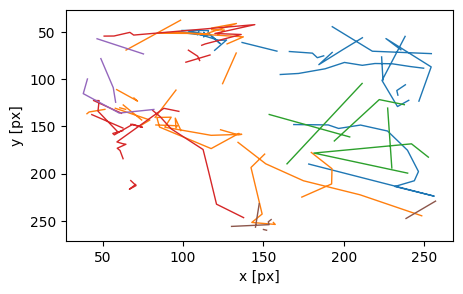

Double check, data contains ALL particle trajectories? (%d)
slope/intercept [2.89013214e+00 5.16961257e+03]


<Figure size 500x300 with 0 Axes>

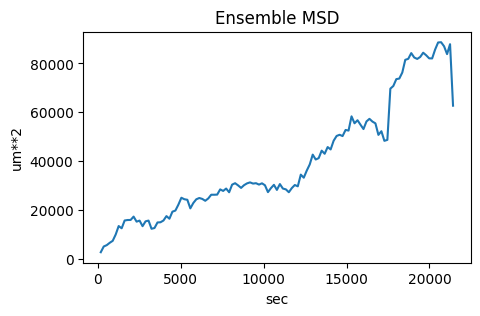

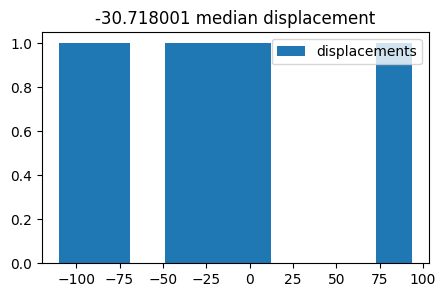

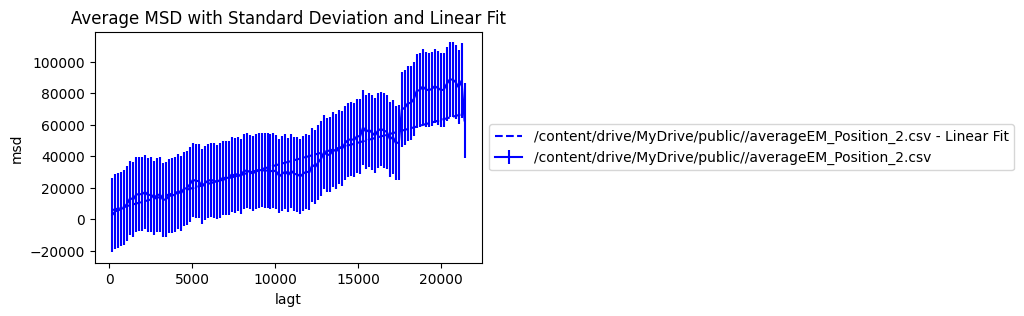

In [ ]:

# compute MSD
ts,traj,msd,im,em=tc.DoMSD(
    fb,
    maxDist=100, # maximum displacement between frames in pixel
    maxMissFrame=10, # allowed number of frames a particle can disappear
    minFrame=10, # minimum number of frames a trajectory needs to last
    pixelSize=1.1, # image pixel size in micron/pixel, specific for each scope and lens (Cytiva 10X: 0.65) and (Spinning Disk: 1.1 at 10X)
    frameRate=1/fr, # image acquisition rate in frames/sec
    max_lagtime=160, # intervals of frames out to which MSD is computed
    name=name
)

# get displacements
dists, xdists = tc.CalcDistances(traj) # performed on trajectories BEFORE drift-correction
med = np.median(xdists)
plt.figure()
plt.title("%f median displacement"%med)
plt.hist(xdists,label="displacements")
plt.legend(loc=0)

# save average MSD for each run to csv file
msdFileName=path+'/averageEM_{}.csv'.format(name)
diffFileName=path+'/diff_{}.csv'.format(name)
if name is not None:
    em.to_csv(msdFileName)
    np.savetxt(diffFileName,np.array(xdists))
    # prompt: save pandas dataframe
    traj.to_csv(path+'/traj_{}.csv'.format(name))
    fb.to_csv(path+'/fbframe_{}.csv'.format(name))

msdFile={
    path+'/averageEM_{}.csv'.format(name):{"color":"blue"}
}
plt.figure()
tc.doMSDFit(msdFile, fittingRange=fittingRange)



# Post processing

Create list of names

slope/intercept [2.89013214e+00 5.16961257e+03]


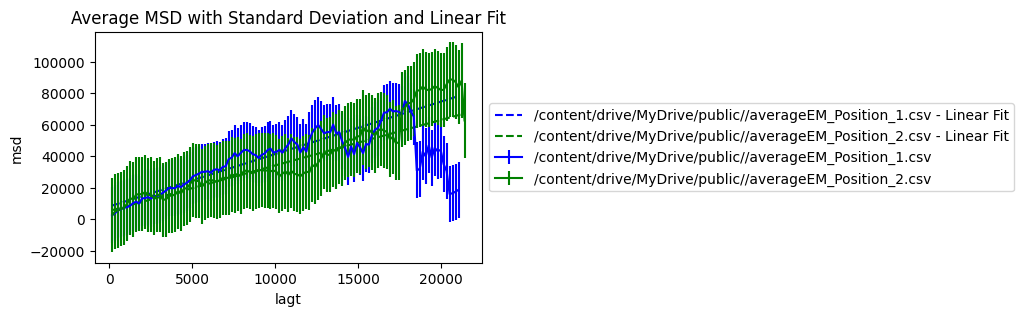

In [ ]:
# import average MSD csv files and plot with Std and linear fit

average_MSD_files={
    'averageEM_Position1.csv':{"color": "blue"},
    'averageEM_Position2.csv':{"color": "purple"},
    'averageEM_Position3.csv':{"color": "red"},
    'averageEM_Position4.csv':{"color": "orange"},
    'averageEM_Position5.csv':{"color": "yellow"},
    'averageEM_Position6.csv':{"color": "green"}
    }
average_MSD_files={
    path+'/averageEM_Position_1.csv':{"color": "blue"},
    path+'/averageEM_Position_2.csv':{"color": "green"},
}


fittingRange=[0,100]
tc.doMSDFit(average_MSD_files, fittingRange=fittingRange)



<font color=red>NEED TO EDIT ONCE I HAVE THE low/high ATP JOBS </font>


### No ATP

Not sure how this naming scheme was decided upon

In [ ]:
# former path
path='/home/pkh-lab-shared/ekrueger2/microscopy_data/Confinement/confinement_data_11_14_22/'
# new path (rsync'd a local copy)
# rsync -ah /home/echo_nfs/microscopy_data/11_14_22_confinement/confinement_data_11_14_22 $KAFKA:/u1/pkekeneshuskey/delme/
#path='/u1/pkekeneshuskey/delme/confinement_data_11_14_22/'
#path="/u1/pkekeneshuskey/delme/confinement_data_12_12_22/xxxx/"

treatment=['11']

#density = ['A']
#fld = ['1','2','3']
#ATPno = ['1','2']


filenames_confinement = []

#for condition in treatment:
#    filenames_confinement.append(path+'Capture1-'+condition+'_XY0_Z0_T000_C0.tif')
filenames_confinement.append(path+'Capture1-Position6_noATP_unconfined_XY1670892965_Z0_T000_C0.tif')
#for dens in density:
    #for f in fld:
        #for ATP in ATPno:
            #filenames_confinement.append(dens+ATP+'_fld'+f+'.tiff')
#print(filenames_confinement)

caseNames = ["-ATP" for x in range(len(filenames_confinement))]
#print(caseNames)

### With ATP

In [ ]:
# with atp?
filenames_confinement_ATP=[]

# they're from the experiments on 12/12/22. here is the pathway for that folder:
# "/home/echo_nfs/microscopy_data/12_12_22_confinement/confinement_data_12_12_22/"
# rsync -ah /home/echo_nfs/microscopy_data/12_12_22_confinement/confinement_data_12_12_22 $KAFKA:/u1/pkekeneshuskey/delme/


# they're named based on being confined/unconfined and ATP/noATP
file="Capture1-Position12_ATP_unconfined_XY1670892971_Z0_T000_C0.tif"

filenames_confinement_ATP.append(path+file)
caseNamesATP = ["+ATP" for x in range(len(filenames_confinement_ATP))]
#print(casesATP)

filenames_confinement =  filenames_confinement + filenames_confinement_ATP
caseNames = caseNames + caseNamesATP


### Load images

In [ ]:
cases = dict()
class empty:pass

In [ ]:

#filename =filenames_confinement[0]
#filename =filenames_confinement[1]
for i,filename in enumerate(filenames_confinement):
#i=0
#filename = filenames_confinement[i]
#if 1:
    print("Processing ",filename)
    # NOT QUITE SURE WHY FRAMES IS USED HERE
    frames = []
    frame = pims.open(filename)
    frames.append(frame)


    # load frame
    v = np.array( frame )
    frame_i=v[:,:,:]
    print( np.shape(frame_i) )

    # display frame
    plt.pcolormesh( np.flipud( frame_i[0,:,:] ), cmap='gray')


    # big steps
    plt.figure()
    fb = DoTracking(frames)
    time1,t1, data = DoMSD(fb,caseNames[i]+".png")
    D,dataavg1 = DoFit(frames,time1,data)
    dists = CalcDistances(t1)
    DoSave(time1,dataavg1)

    # store data
    case = empty()
    case.time1 = time1
    case.dataavg1 = dataavg1
    case.D = D
    case.dists = dists
    case.frame = frame

    cases[caseNames[i]] = case


Processing  /home/pkh-lab-shared/ekrueger2/microscopy_data/Confinement/confinement_data_11_14_22/Capture1-Position6_noATP_unconfined_XY1670892965_Z0_T000_C0.tif


/home/pkekeneshuskey/anaconda3/lib/python3.8/site-packages/pims/api.py:204: UserWarning: <class 'pims.tiff_stack.TiffStack_tifffile'> errored: [Errno 2] No such file or directory: '/home/pkh-lab-shared/ekrueger2/microscopy_data/Confinement/confinement_data_11_14_22/Capture1-Position6_noATP_unconfined_XY1670892965_Z0_T000_C0.tif'
  warn(message)
/home/pkekeneshuskey/anaconda3/lib/python3.8/site-packages/pims/api.py:204: UserWarning: <class 'pims.imageio_reader.ImageIOReader'> errored: No such file: '/home/pkh-lab-shared/ekrueger2/microscopy_data/Confinement/confinement_data_11_14_22/Capture1-Position6_noATP_unconfined_XY1670892965_Z0_T000_C0.tif'
  warn(message)
/home/pkekeneshuskey/anaconda3/lib/python3.8/site-packages/pims/api.py:204: UserWarning: <class 'pims.bioformats.BioformatsReader'> errored: The file "/home/pkh-lab-shared/ekrueger2/microscopy_data/Confinement/confinement_data_11_14_22/Capture1-Position6_noATP_unconfined_XY1670892965_Z0_T000_C0.tif" does not exist.
  warn(messag

UnknownFormatError: All handlers returned exceptions:
<class 'pims.tiff_stack.TiffStack_tifffile'> errored: [Errno 2] No such file or directory: '/home/pkh-lab-shared/ekrueger2/microscopy_data/Confinement/confinement_data_11_14_22/Capture1-Position6_noATP_unconfined_XY1670892965_Z0_T000_C0.tif'
<class 'pims.imageio_reader.ImageIOReader'> errored: No such file: '/home/pkh-lab-shared/ekrueger2/microscopy_data/Confinement/confinement_data_11_14_22/Capture1-Position6_noATP_unconfined_XY1670892965_Z0_T000_C0.tif'
<class 'pims.bioformats.BioformatsReader'> errored: The file "/home/pkh-lab-shared/ekrueger2/microscopy_data/Confinement/confinement_data_11_14_22/Capture1-Position6_noATP_unconfined_XY1670892965_Z0_T000_C0.tif" does not exist.


In [ ]:
frame_i=v[0,100:200,350:450]

plt.pcolormesh(frame_i,cmap='gray')


NameError: name 'v' is not defined

In [ ]:
caseName='-ATP'
case = cases[caseName]
color me black
plt.hist(case.dists,density=True,label='-ATP')

color me red
caseName='+ATP'
case = cases[caseName]
plt.hist(case.dists,alpha=0.5,density=True,label='+ATP')
plt.legend(loc=0)
plt.xlabel("dist")
plt.ylabel("Prob")

KeyError: '+ATP'

* Tests
```
cd tests
```
* Run (kafka)
```
python3 ../brownian_v3.py -yamlFile expt.yaml -run
```
* Process
```
python3 batchProcess.py -single expt # kant for now
```
* upload expt.csv



In [ ]:
simFile = "expt.csv"
simData = np.loadtxt(simFile)

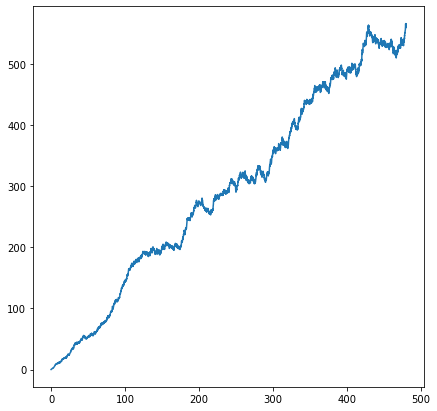

In [ ]:
plt.plot(simData[:,0],simData[:,1])

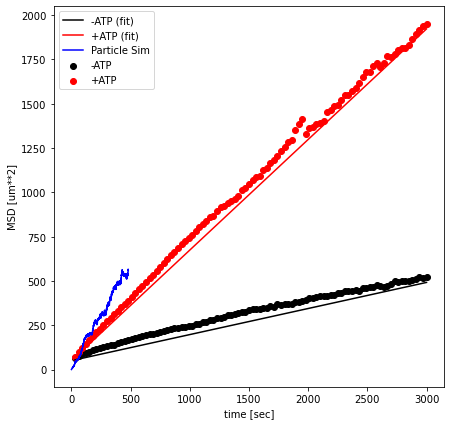

In [ ]:
caseName = '-ATP'
case = cases[caseName]
plt.scatter(case.time1,case.dataavg1,facecolor='k',label=caseName)
msd = np.array(case.time1)*4*case.D + 50
plt.plot(case.time1, msd,'k',label=caseName+" (fit)")


caseName = '+ATP'
case = cases[caseName]
plt.scatter(case.time1,case.dataavg1,facecolor='r',label=caseName)
msd = np.array(case.time1)*4*case.D + 50
plt.plot(case.time1, msd,color='r',label=caseName+" (fit)")

plt.plot(simData[:,0],simData[:,1],color='b',label="Particle Sim")


plt.xlabel("time [sec]")
plt.ylabel("MSD [um**2]")
plt.legend(loc=0)
plt.gcf().savefig("msd.png",dpi=300)

In [ ]:
msd[9]

206.09947014256585